# DATA SUMMARY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline  
import plotly.graph_objs as go  
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
sns.set(color_codes=True)

from sklearn.preprocessing import StandardScaler, LabelEncoder #Machine Learning

In [ ]:
datauniv = pd.read_csv('timesData.csv', delimiter = ",");
points = datauniv.values
datauniv.head(3)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011


In [ ]:
datauniv.tail(2)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016
2602,601-800,Yuan Ze University,Taiwan,16.2,17.7,18.3,28.6,39.8,-,"8,663",20.6,4%,43 : 57,2016


In [ ]:
datauniv.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [ ]:
print("Total", datauniv.shape)
print("Dari code diatas dapat diartikan bahwa data memiliki total 2200 baris dan 14 fitur dari data ini.")

Total (2603, 14)
Dari code diatas dapat diartikan bahwa data memiliki total 2200 baris dan 14 fitur dari data ini.


# DATA PREPROCESSING

## Data Cleaning

In [ ]:
# Total data sebelum di cleaning
datauniv.count()

world_rank                2603
university_name           2603
country                   2603
teaching                  2603
international             2603
research                  2603
citations                 2603
income                    2603
total_score               2603
num_students              2544
student_staff_ratio       2544
international_students    2536
female_male_ratio         2370
year                      2603
dtype: int64

In [ ]:
# Data Duplikat
duplicate_rows = datauniv[datauniv.duplicated()]
print("Data duplikat (Baris, Kolom):", duplicate_rows.shape)

Data duplikat (Baris, Kolom): (0, 14)


In [ ]:
# Data Null
datauniv.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [ ]:
# Clear Data NaN/Null
datauniv = datauniv.dropna()

In [ ]:
# Jumlah data Nan/Null
datauniv.isnull().sum()

world_rank                0
university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
year                      0
dtype: int64

In [ ]:
# Total data setelah di cleaning
datauniv.count()

world_rank                2362
university_name           2362
country                   2362
teaching                  2362
international             2362
research                  2362
citations                 2362
income                    2362
total_score               2362
num_students              2362
student_staff_ratio       2362
international_students    2362
female_male_ratio         2362
year                      2362
dtype: int64

## Data Selection

In [ ]:
datauniv.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [ ]:
datauniv = datauniv.drop(columns = {"total_score","income","international"})

# DATA DESCRIPTIVE

In [ ]:
datauniv.describe()

,teaching,research,citations,student_staff_ratio,year
count,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000
mean,37.146190,35.310288,61.004953,18.707282,2014.092295
std,17.145579,20.876934,23.091455,11.530523,1.682795
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.500000,19.400000,45.500000,12.200000,2013.000000
50%,33.100000,30.100000,62.700000,16.300000,2014.000000
75%,45.700000,46.200000,79.200000,21.900000,2016.000000
max,98.300000,99.400000,100.000000,162.600000,2016.000000


In [ ]:
datauniv.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



teaching                 33.1
research                 30.1
citations                62.7
student_staff_ratio      16.3
year                   2014.0
dtype: float64

In [ ]:
Q1 = datauniv.quantile(0.25)
Q3 = datauniv.quantile(0.75)
IQR = Q3 - Q1

IQR

teaching               21.2
research               26.8
citations              33.7
student_staff_ratio     9.7
year                    3.0
dtype: float64

## Box Plot

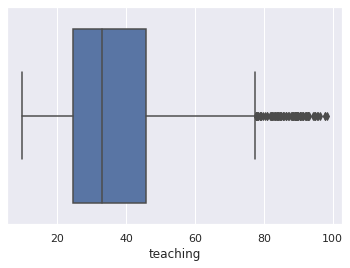

In [ ]:
sns.boxplot(x = datauniv['teaching']);

In [ ]:
# Outliers Detection

Q1 = datauniv["teaching"].quantile(0.25)
Q3 = datauniv["teaching"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print("Batas Bawah = ", lower_bound)
print("Batas Atas = ", upper_bound)
print("Jadi apapun yang berada diluar", lower_bound, " dan", upper_bound, " merupakan Outlier")

Batas Bawah =  -7.300000000000004
Batas Atas =  77.5
Jadi apapun yang berada diluar -7.300000000000004  dan 77.5  merupakan Outlier


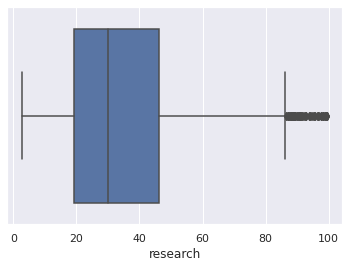

In [ ]:
sns.boxplot(x = datauniv['research']);

In [ ]:
# Outliers Detection

Q1 = datauniv["research"].quantile(0.25)
Q3 = datauniv["research"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print("Batas Bawah = ", lower_bound)
print("Batas Atas = ", upper_bound)
print("Jadi apapun yang berada diluar", lower_bound, " dan", upper_bound, " merupakan Outlier")

Batas Bawah =  -20.800000000000004
Batas Atas =  86.4
Jadi apapun yang berada diluar -20.800000000000004  dan 86.4  merupakan Outlier


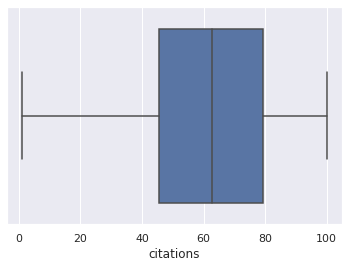

In [ ]:
sns.boxplot(x = datauniv['citations']);

In [ ]:
# Outliers Detection

Q1 = datauniv["citations"].quantile(0.25)
Q3 = datauniv["citations"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print("Batas Bawah = ", lower_bound)
print("Batas Atas = ", upper_bound)
print("Jadi apapun yang berada diluar", lower_bound, " dan", upper_bound, " merupakan Outlier")

Batas Bawah =  -5.050000000000004
Batas Atas =  129.75
Jadi apapun yang berada diluar -5.050000000000004  dan 129.75  merupakan Outlier


## Histogram

Text(0, 0.5, 'Total')

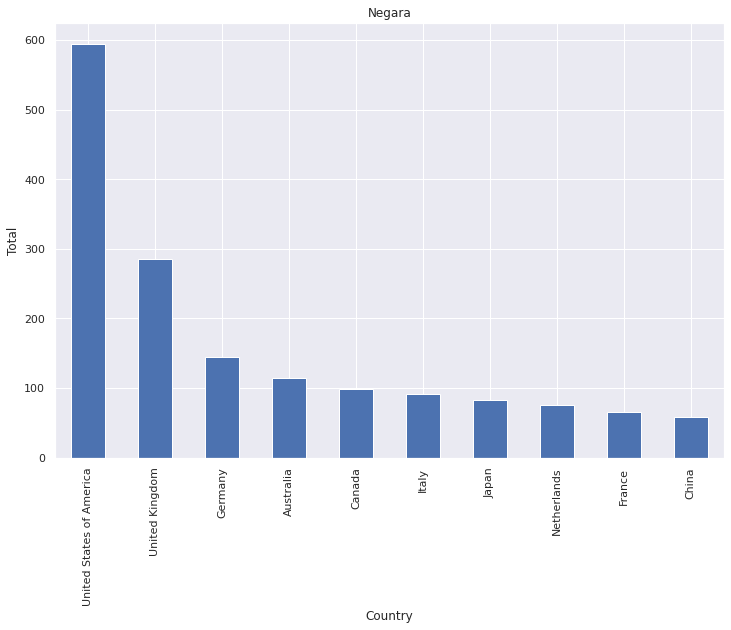

In [ ]:
# Histogram
datauniv.country.value_counts().nlargest(10).plot(kind='bar', figsize=(12,8)) # histogram
plt.title("Negara")
plt.xlabel("Country")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

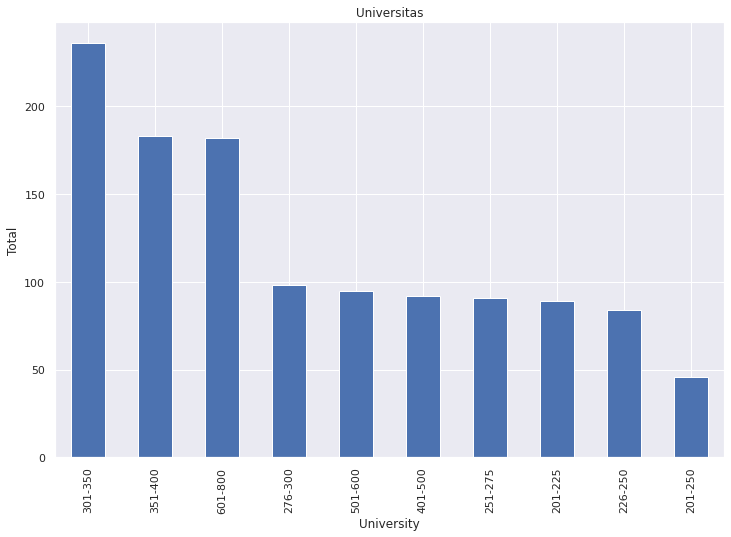

In [ ]:
# Histogram
datauniv.world_rank.value_counts().nlargest(10).plot(kind='bar', figsize=(12,8)) # histogram
plt.title("Universitas")
plt.xlabel("University")
plt.ylabel("Total")

# DATA VISUALIZATION

In [ ]:
# Define Function
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

## Line Chart

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(7.2, 0.8)

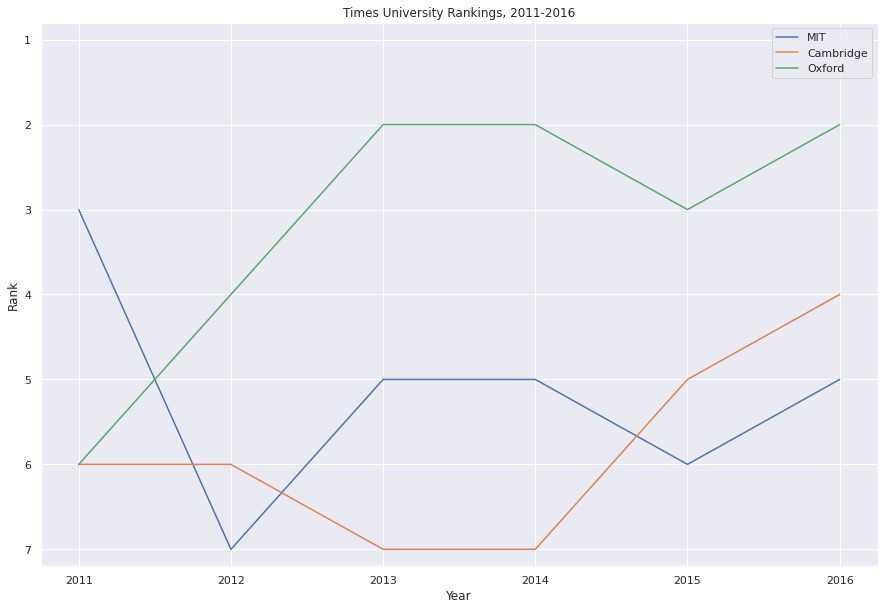

In [ ]:
# Define
harvard=datauniv[datauniv.university_name=='Harvard University']
mit=datauniv[datauniv.university_name=='Massachusetts Institute of Technology']
cambridge=datauniv[datauniv.university_name=='University of Cambridge']
oxford=datauniv[datauniv.university_name=='University of Oxford']

harvard.loc[:,'world_rank'] = harvard.loc[:,'world_rank'].astype(float)
mit.loc[:,'world_rank'] = mit.loc[:,'world_rank'].astype(float)
cambridge.loc[:,'world_rank'] = cambridge.loc[:,'world_rank'].astype(float)
oxford.loc[:,'world_rank'] = oxford.loc[:,'world_rank'].astype(float)

# Figure
plt.figure(figsize=(15,10))
sns.lineplot(x='year', y='world_rank', data=harvard, label='Harvard')
sns.lineplot(x='year', y='world_rank', data=mit, label='MIT')
sns.lineplot(x='year', y='world_rank', data=cambridge, label='Cambridge')
sns.lineplot(x='year', y='world_rank', data=oxford, label='Oxford')


plt.title('Times University Rankings, 2011-2016')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.ylim(7.2,0.8)

In [ ]:
top_100 = datauniv.iloc[:100]
trace1 = go.Scatter(
    x=top_100.world_rank,
    y=top_100.citations,
    mode = "lines",
    name = "Citation",
    marker={"color":"rgba(48, 64, 101, 0.8)"},
    text= top_100.university_name)

trace2= go.Scatter(
    x=top_100.world_rank,
    y=top_100.teaching,
    mode = "lines+markers",
    name = "Teaching",
    marker=dict(color="rgba(0,123,221,.8)"),
    text=top_100.university_name)

data1 = [trace1,trace2]
layout = dict(title = "Kutipan dan Pembelajaran di Top 118 Universitas", xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False))
fig = dict(data = data1, layout = layout)
iplot(fig)

## Scatter Plot

In [ ]:
# Define
World_Rank= datauniv.world_rank[:50]
Citations= datauniv.citations[:50]
Research= datauniv.research[:50]
University = datauniv.university_name[:50]

# Figure
fig = px.scatter_3d(
    datauniv, World_Rank, Citations, Research,
    color=World_Rank, symbol=University,
    title="Scatter Plot korelasi antara Ranking Univ. Top Global 50 dengan Jumlah Research dan Kutipan",
    opacity=0.7,
    size=Research,
    size_max=12)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig.show()

In [ ]:
"""
trace1 = go.Scatter3d(
    x=datauniv.world_rank[:201],
    y=datauniv.research,
    z=datauniv.citations,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255,0,0)',                    
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)
"""

"\ntrace1 = go.Scatter3d(\n    x=datauniv.world_rank[:201],\n    y=datauniv.research,\n    z=datauniv.citations,\n    mode='markers',\n    marker=dict(\n        size=10,\n        color='rgb(255,0,0)',                    \n    )\n)\n\ndata = [trace1]\nlayout = go.Layout(\n    margin=dict(\n        l=0,\n        r=0,\n        b=0,\n        t=0  \n    )\n    \n)\nfig = go.Figure(data=data, layout=layout)\niplot(fig)\n"

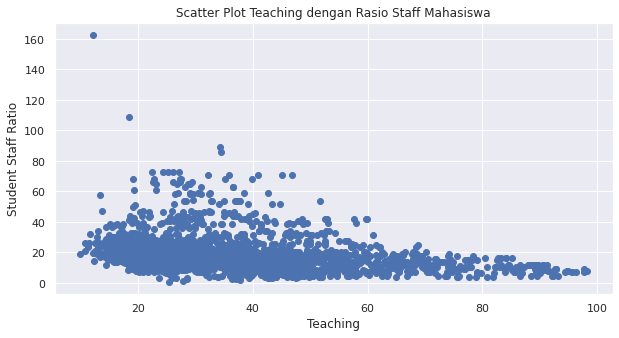

In [ ]:
# Define
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(datauniv['teaching'], datauniv['student_staff_ratio'])
ax.set_xlabel('Teaching')
ax.set_ylabel('Student Staff Ratio')

# Figure
plt.title("Scatter Plot Teaching dengan Rasio Staff Mahasiswa")
plt.show()

## Histogram

In [ ]:
# Rasio gender laki-laki dan perempuan 

# Data Prepare
x2011 = datauniv.female_male_ratio[datauniv.year == 2011]
x2012 = datauniv.female_male_ratio[datauniv.year == 2012]

# Figure
trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "Female",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name = "Male",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title='Rasio Gender Laki - laki dan Perempuan tahun 2011 dan 2012',
                   xaxis=dict(title='Female - Male Ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

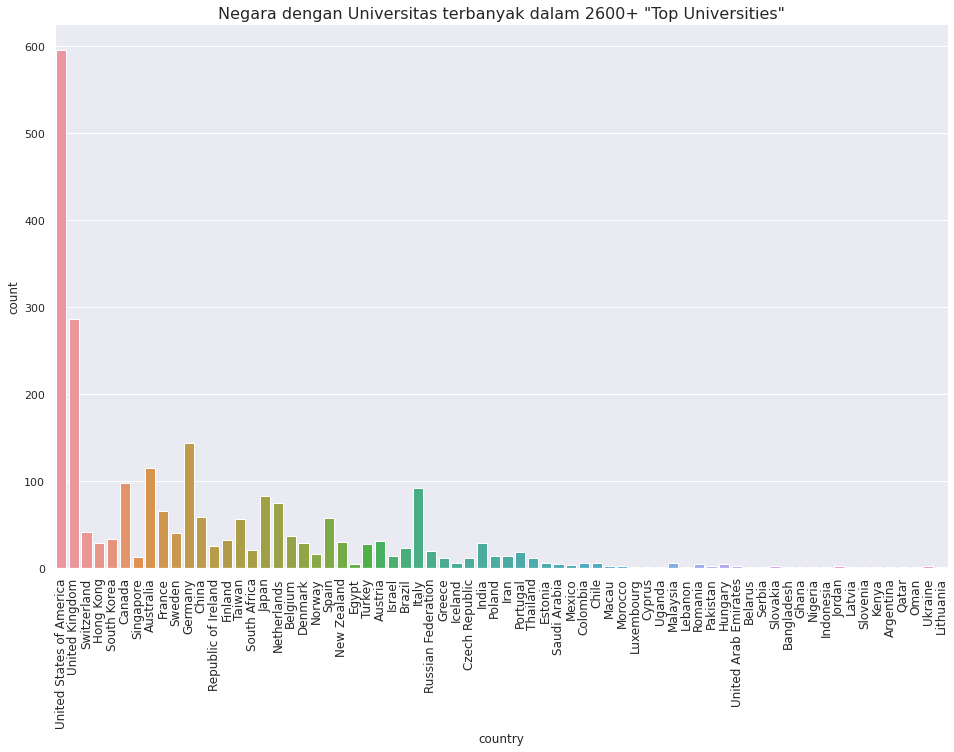

In [ ]:
# Negara dengan Universitas terbanyak dalam 2600+ "Top Universities"
X = datauniv['country']

plt.figure(figsize = (16,10))
plt.title('Negara dengan Universitas terbanyak dalam 2600+ "Top Universities"', size=16)
plt.xticks(fontsize=12, rotation=90 )
sns.countplot(x='country', data=datauniv)

## Word Cloud

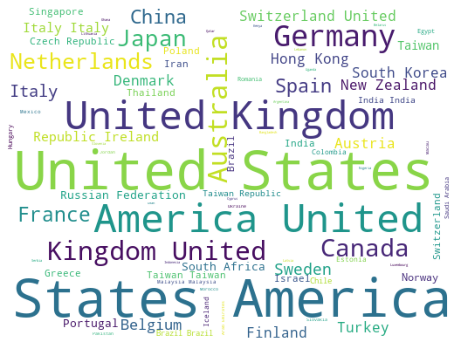

In [ ]:
# Import
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Define
countries = datauniv['country']

# Figure
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
    background_color='white',
    width=512,
    height=384).generate(" ".join(countries))
    
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

## Heatmap

,teaching,research,citations,student_staff_ratio,year
teaching,1.000000,0.913656,0.510993,-0.280385,-0.279468
research,0.913656,1.000000,0.527020,-0.196472,-0.278592
citations,0.510993,0.527020,1.000000,-0.142686,-0.175293
student_staff_ratio,-0.280385,-0.196472,-0.142686,1.000000,0.061974
year,-0.279468,-0.278592,-0.175293,0.061974,1.000000


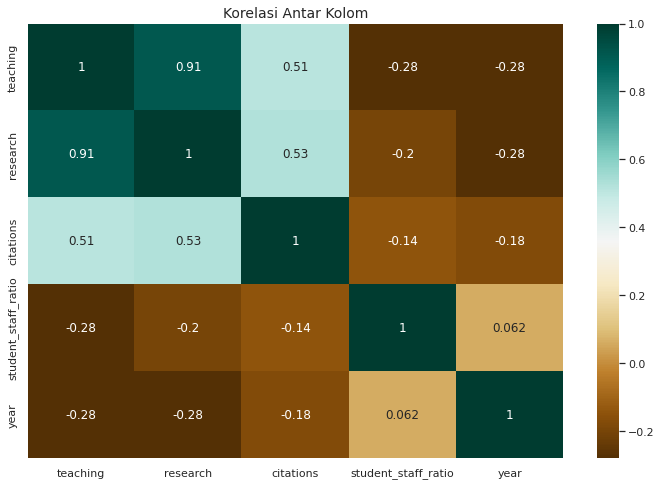

In [ ]:
# Define
c= datauniv.corr()

# Figure
plt.figure(figsize=(12,8))
plt.title("Korelasi Antar Kolom", size=14)
sns.heatmap(c,cmap="BrBG",annot=True)
c

## Pie Chart

In [ ]:
# Define
df2016 = datauniv[datauniv.year == 2016].iloc[:7,:]

pie1 = df2016.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name

# Figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Jumlah Mahasiswa di berbagai Universitas Tahun 2016",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Jumlah Mahasiswa",
                "x": 0.50,
                "y": 0.99
            },
        ]
    }
}
iplot(fig)